In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf

# from openslide import open_slide, __library_version__ as openslide_version
import cv2
from PIL import Image
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

import os
import glob
import shutil


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
history = pd.read_csv('/content/drive/MyDrive/2021Spring/DL_project/metrics/training_history/InceptionV3_zoomhigh2_zoomlow3_multiscale_model_history.csv',index_col=0)

In [6]:
history

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,prc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,val_prc,lr
0,0.545213,423.0,133.0,576.0,191.0,0.755102,0.760791,0.688925,0.829122,0.817945,0.813555,7.0,0.0,100.0,93.0,0.535,1.000000,0.070000,0.715300,0.744441,0.0001
1,0.434324,362.0,83.0,363.0,96.0,0.801991,0.813483,0.790393,0.879971,0.900136,0.461961,82.0,15.0,83.0,20.0,0.825,0.845361,0.803922,0.890256,0.884495,0.0001
2,0.355059,382.0,60.0,402.0,68.0,0.859649,0.864253,0.848889,0.925709,0.916246,0.385031,71.0,3.0,97.0,29.0,0.840,0.959459,0.710000,0.952150,0.958614,0.0001
3,0.306265,387.0,53.0,397.0,67.0,0.867257,0.879545,0.852423,0.944180,0.950177,0.524594,47.0,4.0,99.0,50.0,0.730,0.921569,0.484536,0.917926,0.912744,0.0001
4,0.265465,395.0,48.0,411.0,58.0,0.883772,0.891648,0.871965,0.958993,0.962030,0.385215,75.0,8.0,92.0,25.0,0.835,0.903614,0.750000,0.915900,0.923843,0.0001
5,0.267187,407.0,54.0,390.0,53.0,0.881637,0.882863,0.884783,0.956796,0.960893,0.344155,80.0,2.0,95.0,23.0,0.875,0.975610,0.776699,0.949905,0.953684,0.0001
6,0.247620,392.0,45.0,420.0,55.0,0.890351,0.897025,0.876957,0.964018,0.964041,0.309664,78.0,5.0,97.0,20.0,0.875,0.939759,0.795918,0.953731,0.956029,0.0001
7,0.222761,420.0,42.0,403.0,39.0,0.910398,0.909091,0.915033,0.970938,0.973921,0.322163,77.0,5.0,95.0,23.0,0.860,0.939024,0.770000,0.950400,0.953607,0.0001
8,0.249540,395.0,42.0,424.0,51.0,0.898026,0.903890,0.885650,0.961104,0.961677,0.266479,85.0,10.0,93.0,12.0,0.890,0.894737,0.876289,0.959764,0.958633,0.0001
9,0.217808,423.0,39.0,400.0,42.0,0.910398,0.915584,0.909677,0.971164,0.971054,0.343115,69.0,5.0,99.0,27.0,0.840,0.932432,0.718750,0.941056,0.939011,0.0001


In [21]:
save_dir = '/content/drive/MyDrive/2021Spring/DL_project/'

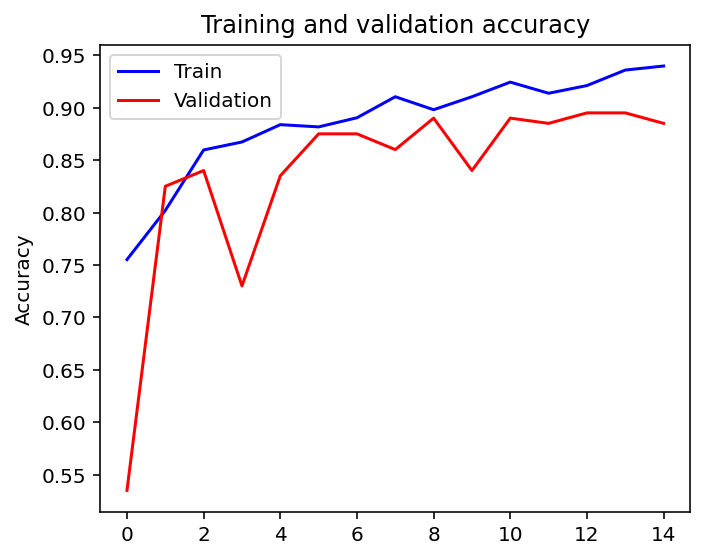

In [22]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(epochs, history.accuracy, 'b',label='Train')
ax.plot(epochs, history.val_accuracy, 'r',label='Validation')
ax.set_title('Training and validation accuracy')
ax.legend()
ax.set_ylabel('Accuracy')

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 310
plt.savefig(save_dir+'Figures/TrainingProescs_accuracy.png')

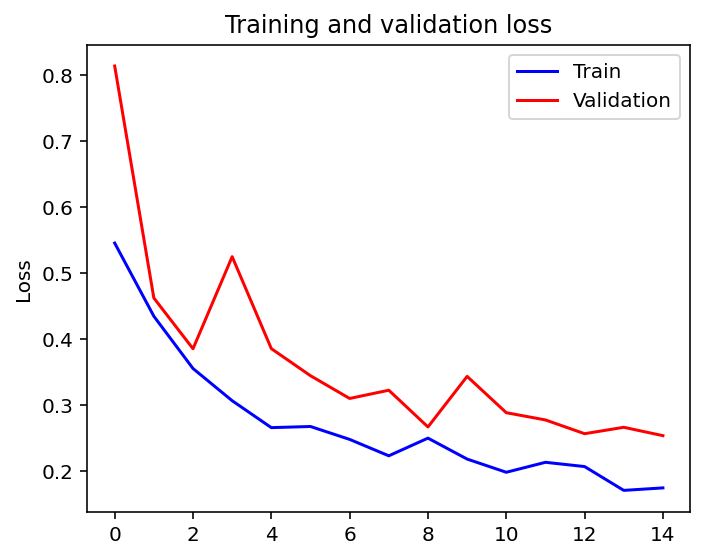

In [23]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(epochs, history.loss, 'b',label='Train')
ax.plot(epochs, history.val_loss, 'r',label='Validation')
ax.set_title('Training and validation loss')
ax.legend()
ax.set_ylabel('Loss')

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 310
plt.savefig(save_dir+'Figures/TrainingProescs_loss.png')

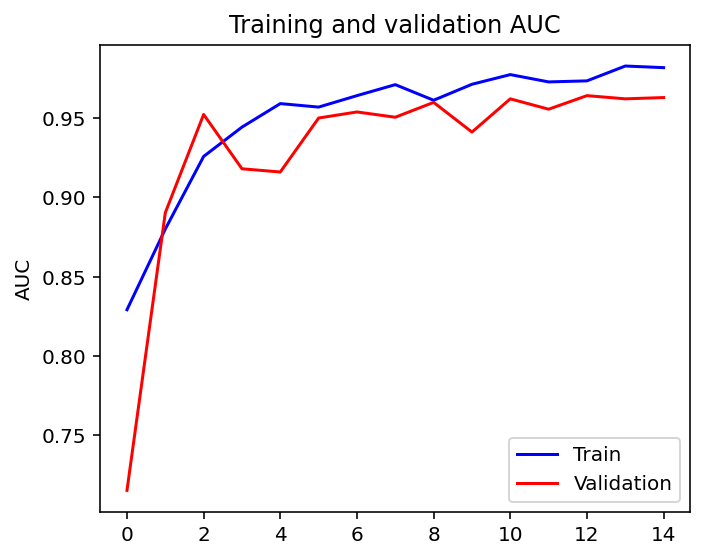

In [24]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(epochs, history.auc, 'b',label='Train')
ax.plot(epochs, history.val_auc, 'r',label='Validation')
ax.set_title('Training and validation AUC')
ax.legend()
ax.set_ylabel('AUC')

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 310
plt.savefig(save_dir+'Figures/TrainingProescs_AUC.png')

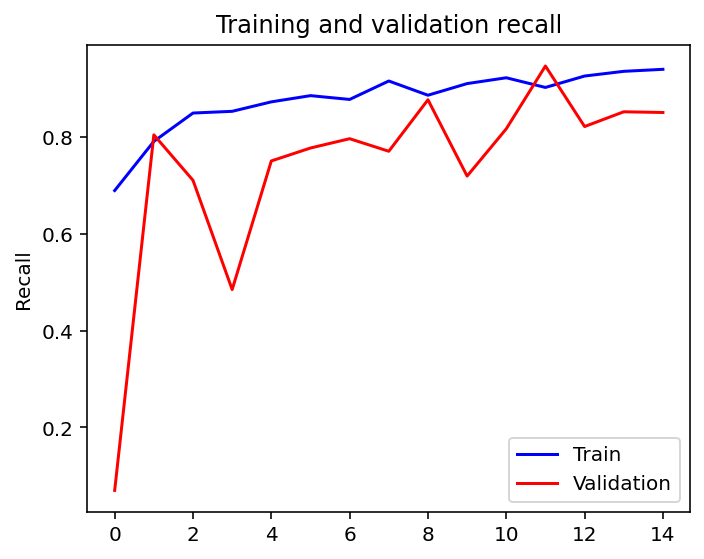

In [25]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(epochs, history.recall, 'b',label='Train')
ax.plot(epochs, history.val_recall, 'r',label='Validation')
ax.set_title('Training and validation recall')
ax.legend()
ax.set_ylabel('Recall')

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 310
plt.savefig(save_dir+'Figures/TrainingProescs_recall.png')

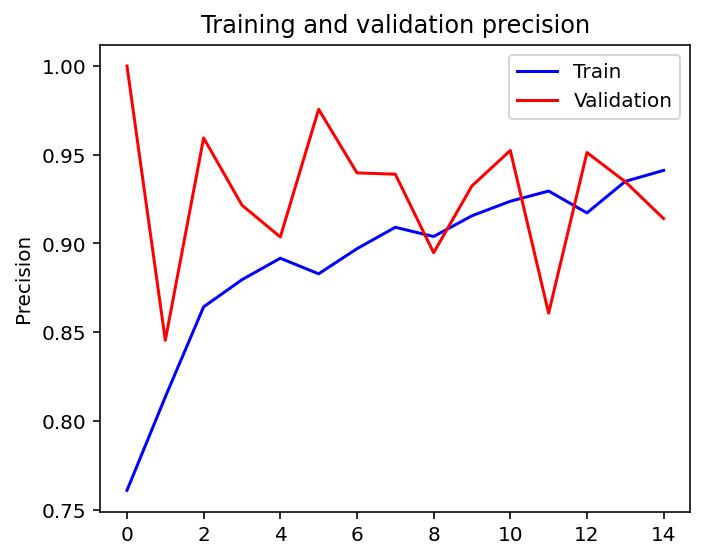

In [26]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(epochs, history.precision, 'b',label='Train')
ax.plot(epochs, history.val_precision, 'r',label='Validation')
ax.set_title('Training and validation precision')
ax.legend()
ax.set_ylabel('Precision')

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 310
plt.savefig(save_dir+'Figures/TrainingProescs_precision.png')